 # Chronic KIdney Disease Prediction Supervised Classification

In [2]:
# import liberary 
import pandas as pd
import numpy as np

In [4]:
# read the csv file
df = pd.read_csv(r"Downloads/archive (45).zip")

In [6]:
# print the dataframe
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Data Understanding

In [8]:
df.shape

(400, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [16]:
df.columns = ["id", "age", "blood_pressure", "specific_gravity", "albumin", "sugar", "red_blood_cells", "pus_cell", "pus_cell_clumps",
              "bacteria", "blood_glucose_random", "blood_urea", "serum_creatinine", "sodium", "potassium", "haemoglobin", "packed_cell_volume",
              "white_blood_cell_count", "red_blood_cell_count", "hypertension", "diabetes_mellitus", "coronary_artery_disease", "appetite", 
              "peda_edema", "anemia", "class"]

In [18]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [20]:
df.duplicated().sum()

0

In [22]:
df.nunique()

id                         400
age                         76
blood_pressure              10
specific_gravity             5
albumin                      6
sugar                        6
red_blood_cells              2
pus_cell                     2
pus_cell_clumps              2
bacteria                     2
blood_glucose_random       146
blood_urea                 118
serum_creatinine            84
sodium                      34
potassium                   40
haemoglobin                115
packed_cell_volume          44
white_blood_cell_count      92
red_blood_cell_count        49
hypertension                 2
diabetes_mellitus            5
coronary_artery_disease      3
appetite                     2
peda_edema                   2
anemia                       2
class                        3
dtype: int64

In [24]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
anemia                      object
class                       object
dtype: object

In [26]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

# Data Pre_Processing

In [29]:
df.drop("id", axis = 1, inplace = True)

In [31]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [33]:
text_columns = ["packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count"]
for i in text_columns:
    print(f"{i}: {df[i].dtype}")

packed_cell_volume: object
white_blood_cell_count: object
red_blood_cell_count: object


In [35]:
def convert_text_to_numeric(df,column):
    df[column] = pd.to_numeric(df[column], errors = "coerce")
    
for column in text_columns:
    convert_text_to_numeric(df,column)
    print(f"{column}: {df[column].dtype}")

packed_cell_volume: float64
white_blood_cell_count: float64
red_blood_cell_count: float64


In [37]:
missing = df.isnull().sum().sort_values(ascending = False)

In [39]:
missing

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [41]:
def mean_value_imputation(df_data, column):
    mean_value = df[column].mean()
    df[column].fillna(value = mean_value, inplace = True)

In [43]:
def mode_value_imputation(df_data, column):
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [48]:
import seaborn as sns

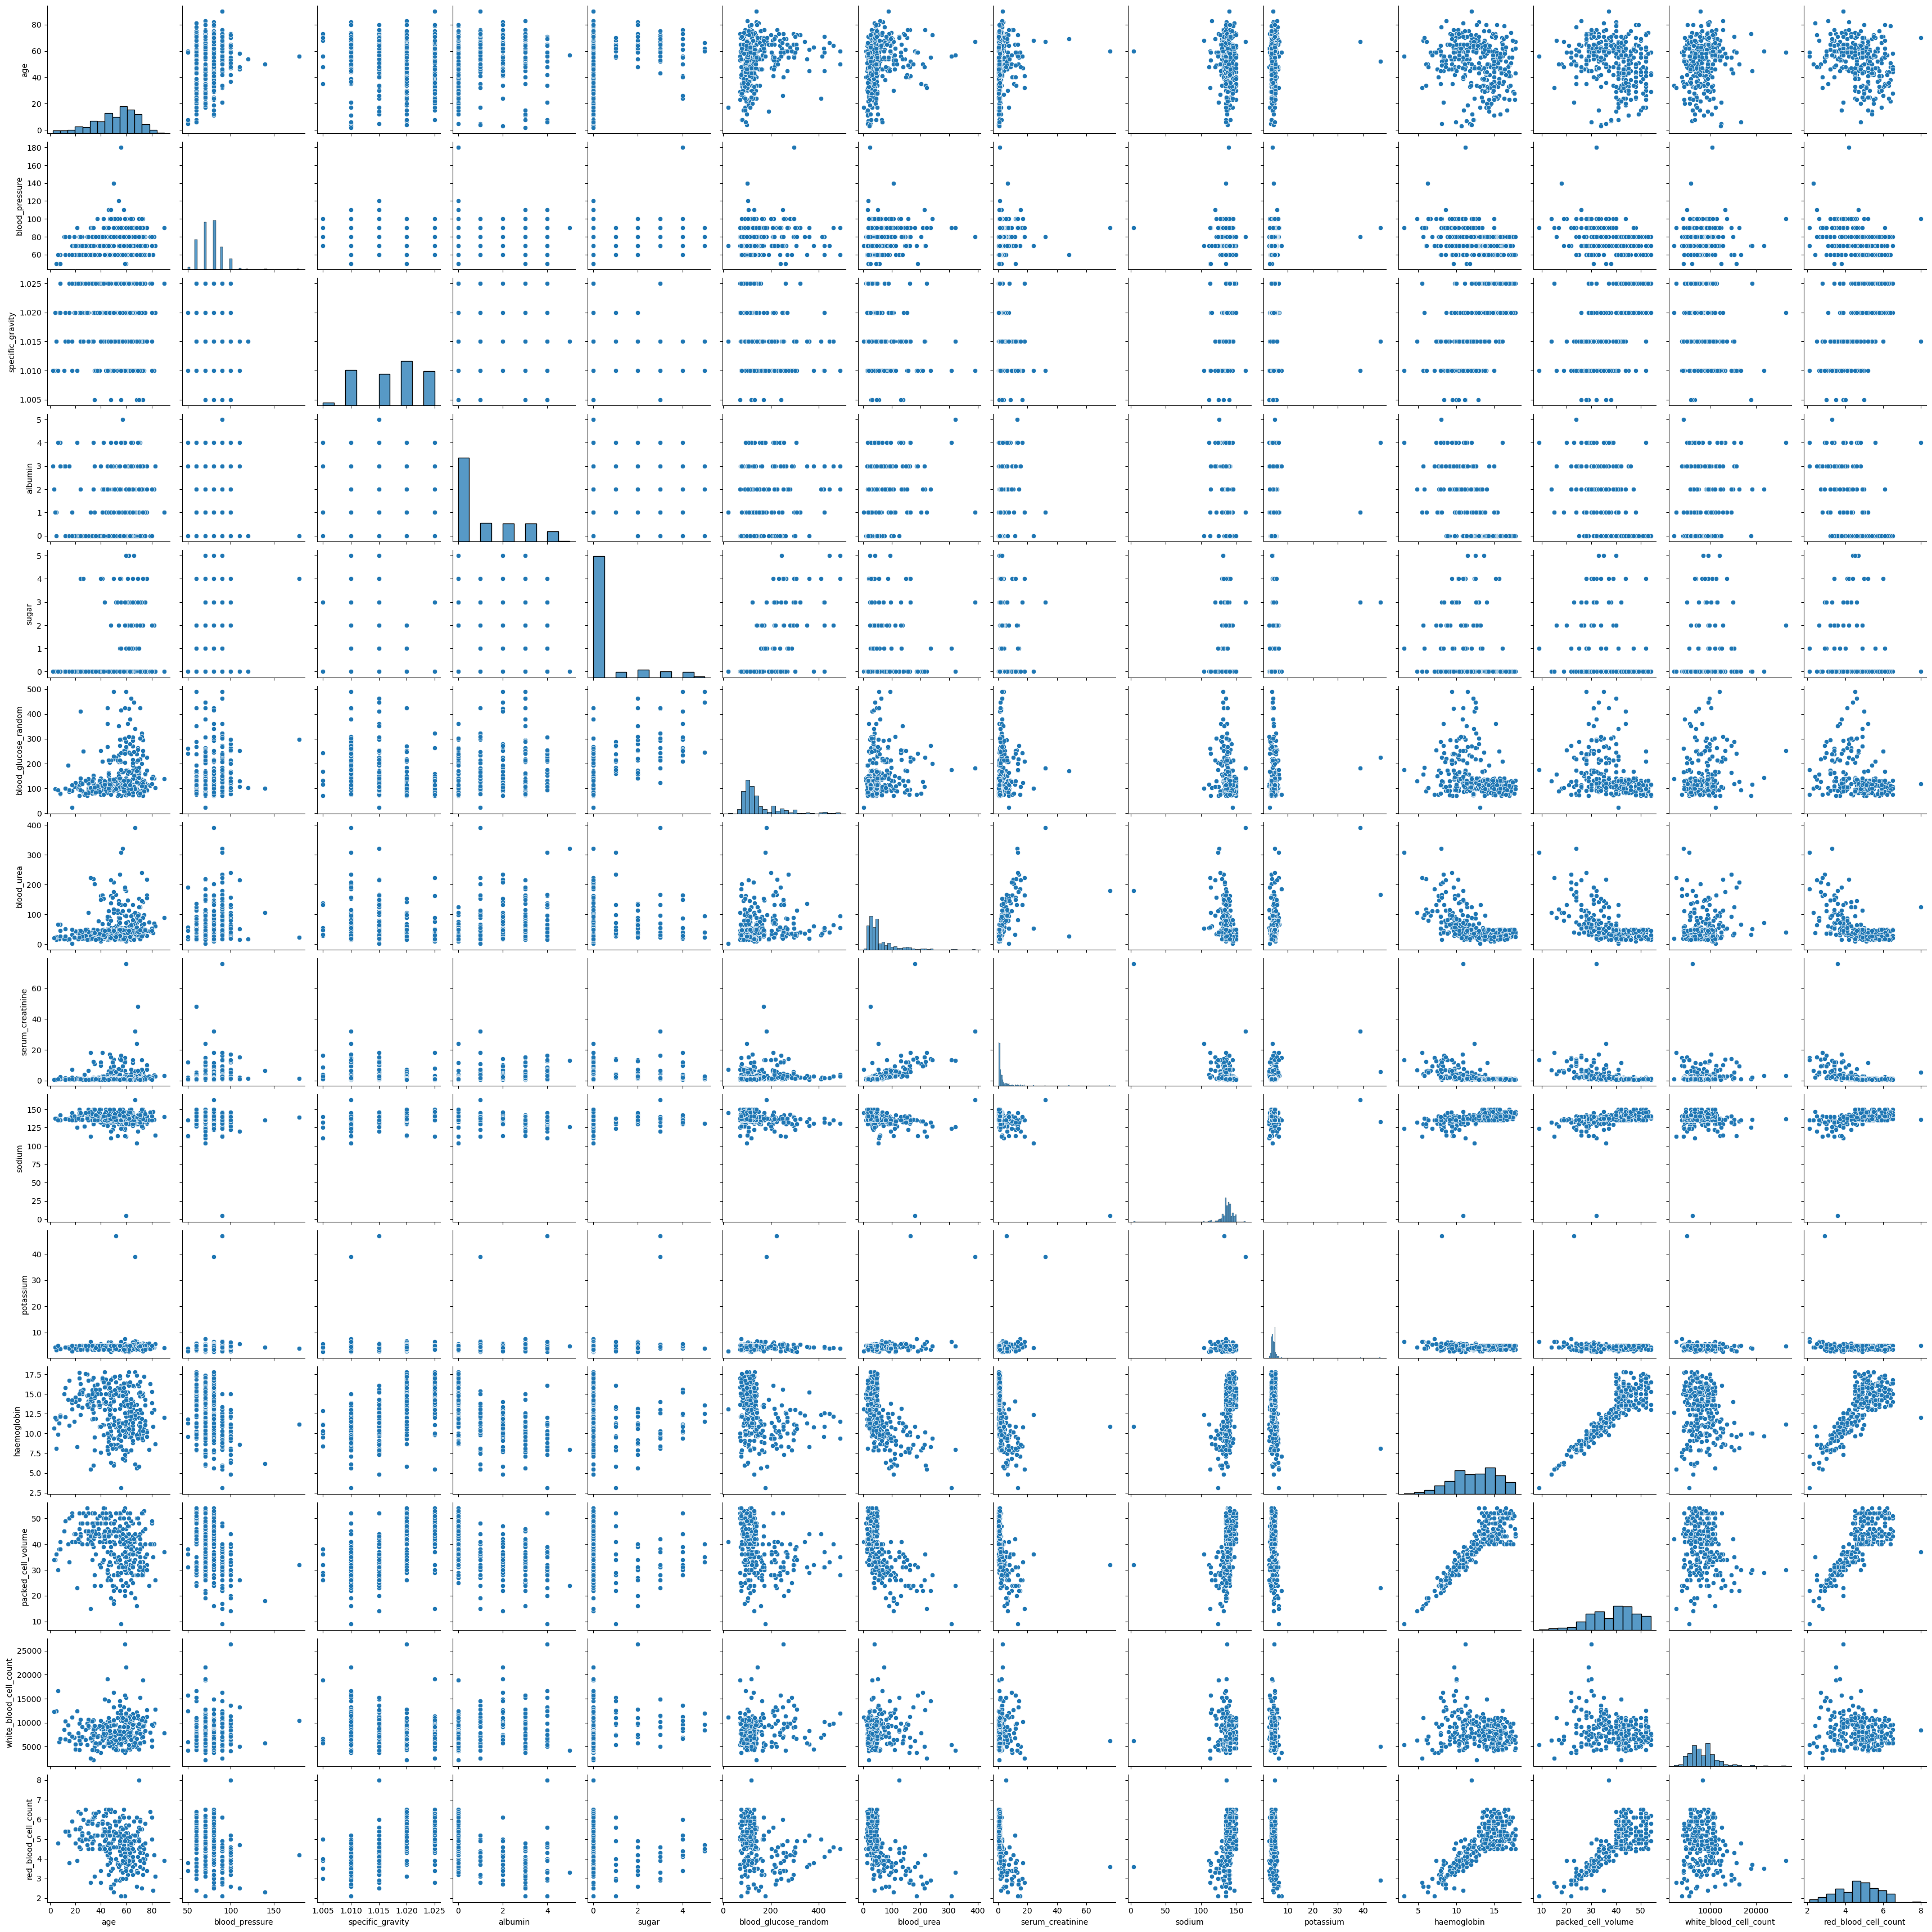

In [51]:
sns.pairplot(df)

In [53]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [55]:
num_cols = [col for col in df.columns if df[col].dtype!="object"]

for col_name in num_cols:
    mean_value_imputation(df,col_name)

C:\Users\NAN RAJA\AppData\Local\Temp\ipykernel_35364\425985109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value = mean_value, inplace = True)


In [57]:
cat_cols = [col for col in df.columns if df[col].dtype=="object"]

for col_name in cat_cols:
    mode_value_imputation(df,col_name)

In [59]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [61]:
df.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd


In [63]:
print(f"diabetes_mellitus:{df["diabetes_mellitus"].unique()}")
print(f"coronary_artery_disease:{df["coronary_artery_disease"].unique()}")
print(f"class:{df["class"].unique()}")

diabetes_mellitus:['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease:['no' 'yes' '\tno']
class:['ckd' 'ckd\t' 'notckd']


In [65]:
df["diabetes_mellitus"] = df["diabetes_mellitus"].replace(to_replace = {" yes":"yes",'\tno':"no", '\tyes':"yes"})
df["coronary_artery_disease"] = df["coronary_artery_disease"].replace(to_replace = {"\tno":"no"})
df["class"] = df["class"].replace(to_replace = {"ckd\t":"ckd","notckd":"not ckd"})

In [67]:
print(f"diabetes_mellitus:{df["diabetes_mellitus"].unique()}")
print(f"coronary_artery_disease:{df["coronary_artery_disease"].unique()}")
print(f"class:{df["class"].unique()}")

diabetes_mellitus:['yes' 'no']
coronary_artery_disease:['no' 'yes']
class:['ckd' 'not ckd']


# Feature Encoding

In [70]:
df['class'] = df['class'].map({"ckd":1, "not ckd":0})
df["red_blood_cells"] = df["red_blood_cells"].map({"normal":1, "abnormal":0})
df["pus_cell"] = df["pus_cell"].map({"normal":1, "abnormal":0})
df["pus_cell_clumps"] = df["pus_cell_clumps"].map({"present":1, "notpresent":0})
df["bacteria"] = df["bacteria"].map({"present":1, "notpresent":0})
df["hypertension"] = df["hypertension"].map({"yes":1, "no":0})
df["diabetes_mellitus"] = df["diabetes_mellitus"].map({"yes":1, "no":0})
df["coronary_artery_disease"] = df["coronary_artery_disease"].map({"yes":1, "no":0})
df["appetite"] = df["appetite"].map({"good":1, "poor":0})
df["peda_edema"] = df["peda_edema"].map({"yes":1, "no":0})
df["anemia"] = df["anemia"].map({"yes":1, "no":0})

In [72]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


# Feature Understanding

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

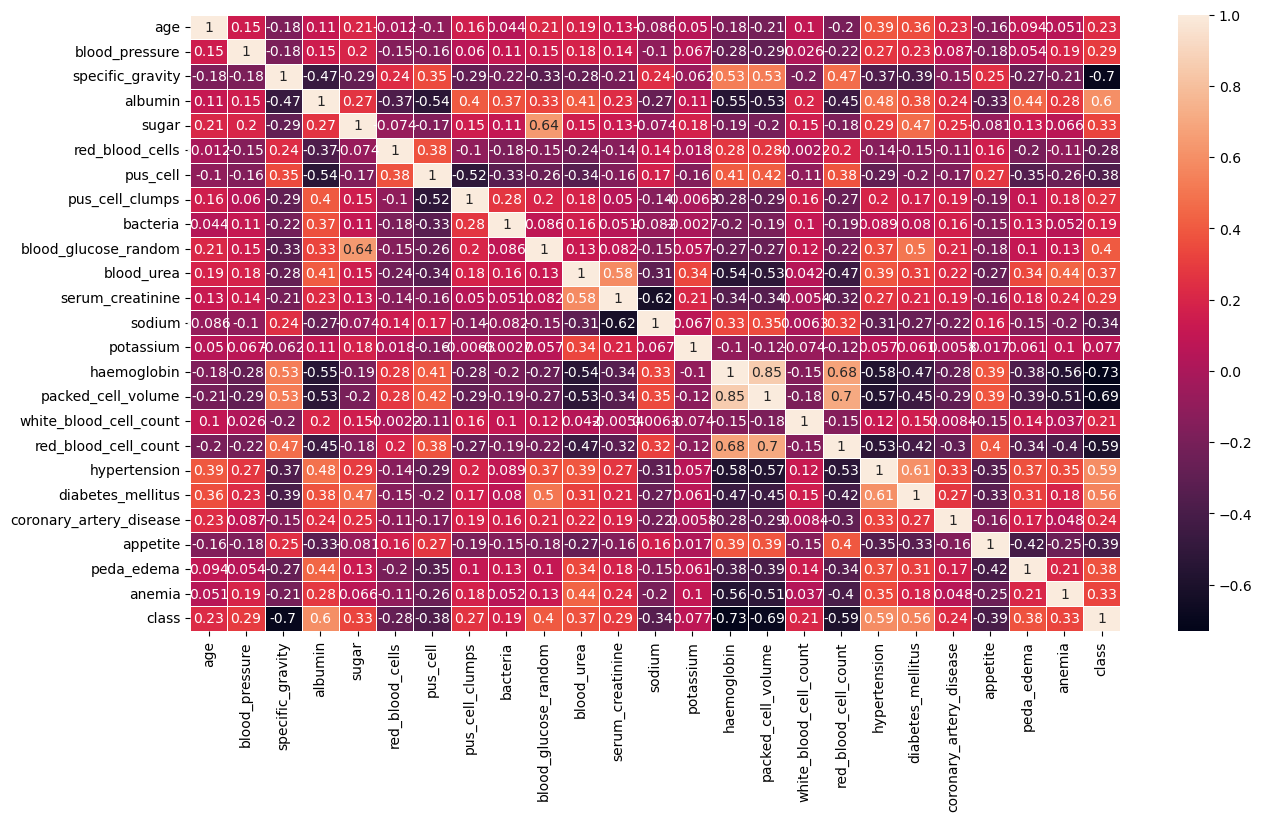

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths = 0.5)
plt.show()

In [79]:
target_corr = df.corr()["class"].abs().sort_values(ascending = False)[1:]
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [81]:
df["class"].value_counts()

class
1    250
0    150
Name: count, dtype: int64

# Preparing the train and test

In [84]:
x = df.drop(columns="class")
y = df["class"]

In [86]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,15.7,47.0,6700.0,4.900000,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,16.5,54.0,7800.0,6.200000,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,15.8,49.0,6600.0,5.400000,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,14.2,51.0,7200.0,5.900000,0,0,0,1,0,0


In [88]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [90]:
df.shape

(400, 25)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
x_test.shape

(80, 24)

In [98]:
x_train.shape

(320, 24)

In [100]:
print(f"'x' shape: {x_train.shape}")
print(f"'xtest' shape: {x_test.shape}")

'x' shape: (320, 24)
'xtest' shape: (80, 24)


In [102]:
set(y)

{0, 1}

In [104]:
out_labels = {"ckd":1, "not ckd":0}

In [106]:
y_mapped = y.map(out_labels)

In [108]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [112]:
x_scaled = scaler.fit_transform(x)

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  This DataSet Model Prediction
- Logistic Regression(LR)
- K-Nearest Neighbors (KNN) Classifier
- Naive Bayes Classifier¶(NB)
- Support Vector Machine (SVM)
- Decision Tree Classifier(DT)
- Random Forest Classifier(RT)
- Extra Trees Classifier(ET)
- AdaBoost Classifier(AB)
- Gradient Boosting Classifier(GB)
- XGBoost Classifier(XGB)


# Logistic Regression(LR)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [139]:
log_model = LogisticRegression()

In [141]:
log_model.fit(x_train,y_train)

C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
y_pred_log= log_model.predict(x_test)

In [145]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.9375


In [147]:
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.96      0.94      0.95        52

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [149]:
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred_log))

confusion_matrix:
 [[26  2]
 [ 3 49]]


# K-Nearest Neighbors (KNN) Classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn_model = KNeighborsClassifier()

In [156]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [158]:
y_pred_knn= knn_model.predict(x_test)

In [159]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.725


In [162]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.89      0.69        28
           1       0.92      0.63      0.75        52

    accuracy                           0.72        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80



In [164]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Confusion Matrix:
 [[25  3]
 [19 33]]


# Hyperparameter Tuning¶

In [167]:
from sklearn.model_selection import GridSearchCV

In [169]:
# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [13, 15, 17, 19, 21],  # Values for k
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 13}
Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.89      0.69        28
           1       0.92      0.63      0.75        52

    accuracy                           0.72        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80



# Naive Bayes Classifier¶(NB)

In [171]:
from sklearn.naive_bayes import GaussianNB

In [172]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [173]:
y_pred_NB = NB_model.predict(x_test)

In [178]:
print("Accuracy:", accuracy_score(y_test, y_pred_NB))

Accuracy: 0.9875


In [180]:
print("Classification Report:\n", classification_report(y_test, y_pred_NB))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [182]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_NB))


Confusion Matrix:
 [[28  0]
 [ 1 51]]


# Support Vector Machine (SVM)

In [185]:
from sklearn.svm import SVC

In [187]:
svm_model = SVC(kernel='poly', gamma = 'scale', C=20)

In [189]:
svm_model.fit(x_train, y_train)

SVC(C=20, kernel='poly')

In [191]:
y_pred_svm = svm_model.predict(x_test)

In [193]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.65


In [195]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.65      1.00      0.79        52

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [197]:
params_grid={
    'gamma':[0,0.1,0.01,0.2,1,2,3,4,5,6,7,10,'scale'],
    'C':[1,2,3,4,5,10,15,20,25,30,35,50],
    'kernel':['rbf']
}

In [199]:
grided = SVC()
grid_model = GridSearchCV(estimator = grided, param_grid = params_grid, cv=5,scoring = 'accuracy', verbose=3 )

In [201]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 156 candidates, totalling 780 fits
[CV 1/5] END ..........C=1, gamma=0, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=0, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=0, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=0, kernel=rbf;, score=0.609 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=0, kernel=rbf;, score=0.609 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 50],
                         'gamma': [0, 0.1, 0.01, 0.2, 1, 2, 3, 4, 5, 6, 7, 10,
                                   'scale'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [202]:
grid_model.best_estimator_

SVC(C=50)

In [203]:
best_model = grid_model.best_estimator_

In [204]:
predictions = best_model.predict(x_test)

In [209]:
print(accuracy_score(y_test, predictions))

0.6875


In [211]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.36      0.44        28
           1       0.71      0.87      0.78        52

    accuracy                           0.69        80
   macro avg       0.65      0.61      0.61        80
weighted avg       0.67      0.69      0.66        80



# Decision Tree Classifier(DT)

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
DTC = DecisionTreeClassifier()

In [218]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [220]:
y_pred_DTC= DTC.predict(x_test)

In [222]:
print("Accuracy:", accuracy_score(y_test, y_pred_DTC))

Accuracy: 0.9875


In [224]:
print("Classification Report:\n", classification_report(y_test, y_pred_DTC))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# Random Forest Classifier(RT)

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
RFC = RandomForestClassifier()

In [231]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [232]:
y_pred_RFC= RFC.predict(x_test)

In [235]:
print("Accuracy:", accuracy_score(y_test, y_pred_RFC))

Accuracy: 1.0


In [237]:
print("Classification Report:\n", classification_report(y_test, y_pred_RFC))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Extra Trees Classifier(ET)

In [240]:
from sklearn.ensemble import ExtraTreesClassifier

In [242]:
ETC = ExtraTreesClassifier()

In [244]:
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [245]:
y_pred_ETC= ETC.predict(x_test)

In [248]:
print("Accuracy:", accuracy_score(y_test, y_pred_ETC))

Accuracy: 1.0


In [250]:
print("Classification Report:\n", classification_report(y_test, y_pred_ETC))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# AdaBoost Classifier(AB)

In [253]:
from sklearn.ensemble import AdaBoostClassifier

In [255]:
ABC = AdaBoostClassifier()

In [257]:
ABC.fit(x_train,y_train)

C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [259]:
y_pred_ABC= ABC.predict(x_test)

In [261]:
print("Accuracy:", accuracy_score(y_test, y_pred_ABC))

Accuracy: 0.9875


In [263]:
print("Classification Report:\n", classification_report(y_test, y_pred_ABC))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# Gradient Boosting Classifier(GB)

In [266]:
from sklearn.ensemble import GradientBoostingClassifier

In [268]:
GBC = GradientBoostingClassifier()

In [270]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [271]:
y_pred_GBC = GBC.predict(x_test)

In [274]:
print("Accuracy:", accuracy_score(y_test, y_pred_GBC))

Accuracy: 0.9875


In [276]:
print("Classification Report:\n", classification_report(y_test, y_pred_GBC))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# Model Prediction

In [279]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.9375


In [281]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.725


In [283]:
print("Accuracy:", accuracy_score(y_test, y_pred_NB))

Accuracy: 0.9875


In [285]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.65


In [287]:
print("Accuracy:", accuracy_score(y_test, y_pred_DTC))

Accuracy: 0.9875


In [289]:
print("Accuracy:", accuracy_score(y_test, y_pred_RFC))

Accuracy: 1.0


In [291]:
print("Accuracy:", accuracy_score(y_test, y_pred_ETC))

Accuracy: 1.0


In [293]:
print("Accuracy:", accuracy_score(y_test, y_pred_ABC))

Accuracy: 0.9875


In [295]:
print("Accuracy:", accuracy_score(y_test, y_pred_GBC))

Accuracy: 0.9875


- Extra Trees Classifier (ETC): Accuracy = 1.0
- Random Forest Classifier (RFC): Accuracy = 1.0
- Decision Tree Classifier(DT): ACcuracy = 0.9875
- Naive Bayes (NB) or Gradient Boosting Classifier (GBC): Accuracy = 0.9875
- Gradient Boosting Classifier(GB)¶ or AdaBoost Classifier(AB): Accuracy = 0.9875

In [298]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [300]:
input =[[48,80,1,1,0,1,1,0,0,121,44,780,5,2,1,1,0,0,1,0,1,1,0,1]]
features_scaled= scaler.transform(input)
y_pred_ETC= ETC.predict(features_scaled)

C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\NAN RAJA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [312]:
y_pred_ETC

array([1], dtype=int64)